In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('F:\income_prediction.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
#Checking features in which '?' appearing
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [5]:
#Performing statistical method 'mode' to figure maximum number of occurrence maximum value
df['workclass'].mode()


0    Private
dtype: object

In [6]:
df['occupation'].mode()


0    Prof-specialty
dtype: object

In [7]:
df['native_country'].mode()


0    United-States
dtype: object

## Filling ? values

In [8]:
#Filling '?' values
df['workclass']=df['workclass'].replace('?','Private')
df['occupation']=df['occupation'].replace('?','Prof-speciatly')
df['native_country']=df['native_country'].replace('?','United-States')

In [9]:
#Checking Output
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-speciatly,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-speciatly,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,>50K


## Droped Feature

In [10]:
df.drop('education', axis=1 ,inplace=True)

In [11]:
df.marital_status.value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [12]:
#martial status
df['marital_status']=df['marital_status'].replace(['Married-civ-spouse','Married-AF-spouse'],'married')
df['marital_status']=df['marital_status'].replace(['Never-married'],'un-married')
df['marital_status']=df['marital_status'].replace(['Divorced','Separated','Widowed','Married-spouse-absent'],'other')

In [13]:
#income
df.income = df.income.replace('<=50K',0)
df.income = df.income.replace('>50K',1)

In [14]:
df

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Private,77053,9,other,Prof-speciatly,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,9,other,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,10,other,Prof-speciatly,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,4,other,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,10,other,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,10,un-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,12,married,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,9,married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,9,other,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0
income,32561.0,0.240810,0.427581,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

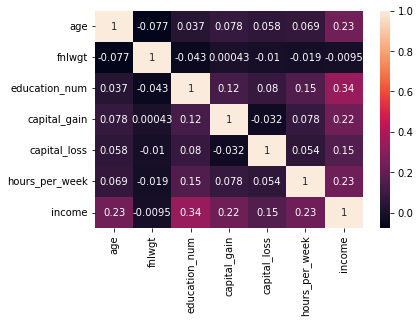

In [16]:
sns.heatmap(df.corr(),annot=True)

## outliers from fnlwgt

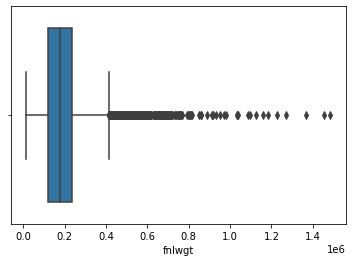

In [17]:
#Checking for outliers in fnlwgt
sns.boxplot(x='fnlwgt',data=df);

In [18]:
#Function to remove ouliers
def remove_outliers(df,x):
    q25, q75 = np.percentile(df[x],25), np.percentile(df[x],75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = 1, (q75 + cut_off)
    df = df[(df[x] < upper) & (df[x] > lower)]
    print('Outliers of "{}" are removed\n'.format(x))
    return df

In [19]:
#Removing outliers from fnlwgt
df=remove_outliers(df,'fnlwgt')

Outliers of "fnlwgt" are removed



<AxesSubplot:>

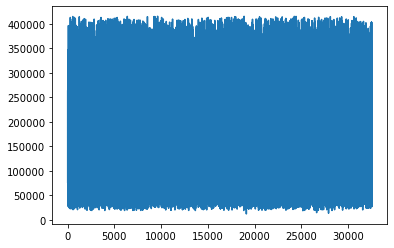

In [20]:
df.fnlwgt.plot()

## outliers from age

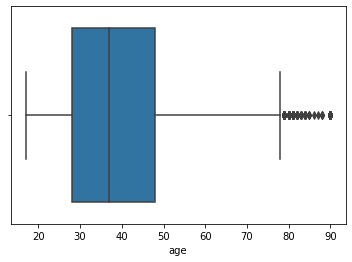

In [21]:
sns.boxplot(x='age',data=df);

In [22]:
def remove_outliers(df,x):
    q25, q75 = np.percentile(df[x],25), np.percentile(df[x],75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = 1, (q75 + cut_off)
    df = df[(df[x] < upper) & (df[x] > lower)]
    print('Outliers of "{}" are removed\n'.format(x))
    return df

In [23]:
#Removing outliers from age
df=remove_outliers(df,'age')

Outliers of "age" are removed



<AxesSubplot:>

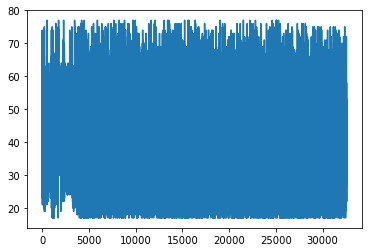

In [24]:
df.age.plot()

## removing outliers from hours_per_week

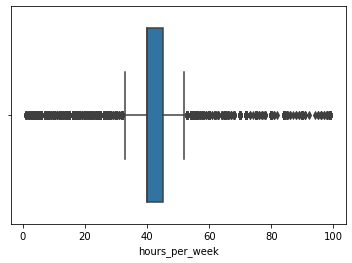

In [25]:
sns.boxplot(x='hours_per_week',data=df);

In [26]:
#Function to remove outliers hours_per_week
def removeOutliers(x, outlierConstant):
     a = np.array(x)
     upper_quartile = np.percentile(a, 75)
     lower_quartile = np.percentile(a, 25)
     IQR = (upper_quartile - lower_quartile) * outlierConstant
     quartileSet = (lower_quartile - IQR, upper_quartile + IQR)
     resultList = []
     for y in a.tolist():
         if y >= quartileSet[0] and y <= quartileSet[1]:
             resultList.append(y)
     return df
    
    

In [27]:
#Removing outliers from 'hours_per_week'
df=remove_outliers(df,'hours_per_week')

Outliers of "hours_per_week" are removed



<AxesSubplot:>

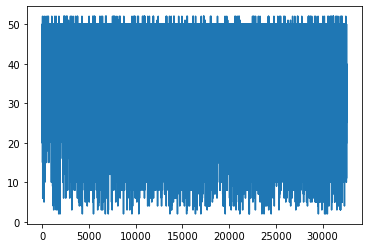

In [28]:
df.hours_per_week.plot()

## Independent-Dependent

In [29]:
X=df.drop(['income'],axis=True)
y=df['income']
df

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
2,66,Private,186061,10,other,Prof-speciatly,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,4,other,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,10,other,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,9,other,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,6,other,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,10,un-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,12,married,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,9,married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,9,other,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


## OneHot Encoding

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
X=pd.get_dummies(X,drop_first=True)
X

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
2,66,186061,10,0,4356,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,216864,9,0,3770,45,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,38,150601,6,0,3770,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32557,27,257302,12,0,0,38,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32558,40,154374,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32559,58,151910,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## Spliting

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

## Scalling

In [33]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(X_train,y_train)
prediction=lr.predict(X_test)
# print("Training Accuracy",lr.score(X_train,y_train))
# print("Testing Accuracy",lr.score(X_test,y_test))

In [35]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,prediction)
cm1=metrics.f1_score(y_test,prediction)
#print("Confusion Matrix",cm)
print("f1 Score:",cm1)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,prediction))

f1 Score: 0.6430963900260512
Accuracy Score:
0.8629020729092208
